In [22]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly as px
from inspect import Attribute
import os

In [23]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycairo
!pip install cairocffi

In [26]:
from ts2vg import NaturalVG
from ts2vg import HorizontalVG

Porting to Google Drive to access all subject datas

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path="/content/drive/MyDrive/New folder (1)/New folder (1)" 

Using glob getting all subject csv files 

In [29]:
files=glob.glob(path + '/*.csv', recursive=True)
 

Creating a empty list

In [30]:
a=[]

reading each subject csv from files and appending 1000:2024 records in the created list named a

In [31]:
for f in files:
    stock = os.path.basename(f)
    # read in csv
    temp_df = pd.read_csv(f)[999:2024]
    temp_df['subject'] = stock
    temp_df['subject'] = temp_df['subject'].replace(".csv", "", regex=True)
    # append df to list
    a.append(temp_df)


<ipython-input-31-25b7b07174bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['subject'] = stock
<ipython-input-31-25b7b07174bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['subject'] = temp_df['subject'].replace(".csv", "", regex=True)


Transforming List 'a' to dataframe 'df'

In [32]:
df = pd.concat(a, axis=0)
print(df.shape)
df

(123000, 6)


,id,attr_time,attr_x,attr_y,attr_z,subject
999,1000,1436463470017,-6.412870,1.714248,-0.473453,subject6_walking_head
1000,1001,1436463470034,-6.611588,1.914763,-0.325611,subject6_walking_head
1001,1002,1436463470041,-6.715137,2.017714,-0.122104,subject6_walking_head
1002,1003,1436463470062,-6.715736,2.276287,-0.184952,subject6_walking_head
1003,1004,1436463470081,-7.158663,2.600702,-0.332195,subject6_walking_head
...,...,...,...,...,...,...
2019,2020,1436964150815,-6.136938,0.896030,-0.421978,subject12_walking_head
2020,2021,1436964150836,-6.086659,0.831387,-0.330400,subject12_walking_head
2021,2022,1436964150856,-7.472902,0.594959,-0.119112,subject12_walking_head
2022,2023,1436964150877,-8.807670,0.667384,-0.061052,subject12_walking_head


Splitting Column names subject into subject, Activity and part.

In [33]:
from pandas.core.internals import concat
x=df["subject"].str.split("_", n = 0, expand = True)
df["subject"]=x[0]
df["Activity"]=x[1]
df["part"]=x[2]
df.sort_values("subject",ascending=False)

,id,attr_time,attr_x,attr_y,attr_z,subject,Activity,part
2022,2023,1436621358445,-0.047884,0.890643,1.196502,subject9,running,head
1895,1896,1436619055546,-8.227076,2.516905,-3.210625,subject9,climbingup,head
1677,1678,1436619051183,-6.506842,3.182492,-3.038242,subject9,climbingup,head
1678,1679,1436619051201,-5.607220,3.013103,-2.912546,subject9,climbingup,head
1679,1680,1436619051225,-5.752070,2.929306,-2.849100,subject9,climbingup,head
...,...,...,...,...,...,...,...,...
1681,1682,1435997001661,8.414422,4.930260,3.915118,subject1,climbingdown,chest
1680,1681,1435997001641,9.581595,5.091868,3.074155,subject1,climbingdown,chest
1679,1680,1435997001621,11.255142,5.573701,2.819771,subject1,climbingdown,chest
1678,1679,1435997001601,13.733141,6.879140,4.246715,subject1,climbingdown,chest


In [34]:
final=df.copy()
final

,id,attr_time,attr_x,attr_y,attr_z,subject,Activity,part
999,1000,1436463470017,-6.412870,1.714248,-0.473453,subject6,walking,head
1000,1001,1436463470034,-6.611588,1.914763,-0.325611,subject6,walking,head
1001,1002,1436463470041,-6.715137,2.017714,-0.122104,subject6,walking,head
1002,1003,1436463470062,-6.715736,2.276287,-0.184952,subject6,walking,head
1003,1004,1436463470081,-7.158663,2.600702,-0.332195,subject6,walking,head
...,...,...,...,...,...,...,...,...
2019,2020,1436964150815,-6.136938,0.896030,-0.421978,subject12,walking,head
2020,2021,1436964150836,-6.086659,0.831387,-0.330400,subject12,walking,head
2021,2022,1436964150856,-7.472902,0.594959,-0.119112,subject12,walking,head
2022,2023,1436964150877,-8.807670,0.667384,-0.061052,subject12,walking,head


In [35]:
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 
df_final=pd.DataFrame()
a=my_dictionary() # creating empty dictionary
arrl=[] # creating empty list for appending axis(x,y,z)
arrk=[] # creating empty list for appending part(head,chest)
arrj=[] # creating empty list for appending activity(running,walking,climbingup.climbingdown)
arri=[] # creating empty list for appending subject numbers(1 to 15)
arrx=[] # creating empty list for appending average degree for each subject,part,activitymethod,axis
arry=[] # creating empty list for appending average network diameter for each subject,part,activitymethod,axis
arrz=[] # creating empty list for appending average path length for each subject,part,activitymethod,axis
arrv=[] # creating empty list for appending method(hvg,nvg)
from ts2vg import HorizontalVG
from ts2vg import NaturalVG
import numpy as np
h = HorizontalVG()
n = NaturalVG()
for i in range(1,16): # for subjects 1 to 15
  x="subject"+str(i) 
  new=df[df["subject"]==x] # assigning all datas of each subject to new data frame
  y=["walking","running","climbingup","climbingdown"]
  for j in y: # for each activity
    new1=new[new["Activity"]==j] # from new data frame filtering out further for each activity and assigning to new1 data frame.
    z=["head","chest"]
    for k in z: # for each part
      new2=new1[new1["part"]==k] # from new1 data frame filtering out further for each part and assigning to new2 data frame.
      m=['attr_x','attr_y','attr_z']
      for l in m: # for each axis
        o=['HVG','NVG']
        for p in o: # for each visibility method
          if p=='HVG': # computing metrics for hvg method and appending values to respective arrays
            h.build(new2[l])
            ig_g = h.as_igraph()
            arrx.append(np.mean(ig_g.degree()))
            arry.append(ig_g.diameter())
            arrz.append(ig_g.average_path_length())
            arrv.append(p)
          elif p=='NVG': # computing metrics for nvg method and appending values to respective arrays
            n.build(new2[l])
            ig_g = n.as_igraph()
            arrx.append(np.mean(ig_g.degree()))
            arry.append(ig_g.diameter())
            arrz.append(ig_g.average_path_length())
            arrv.append(p)
          arrl.append(l)
          arrk.append(k)
          arrj.append(j)
          arri.append(i)
a.add("axis",arrl) # adding respective arrays to respective keys in the dictionary
a.add("part",arrk)
a.add("Activity",arrj)
a.add("subject",arri)
a.add("Method",arrv)
a.add("Average degree",arrx)
a.add("Network diameter",arry)
a.add("Average path length",arrz) 

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [36]:
final_df=pd.DataFrame.from_dict(a)  # transforming from dictionary to data frame
final_df

,axis,part,Activity,subject,Method,Average degree,Network diameter,Average path length
0,attr_x,head,walking,1,HVG,3.947317,35.0,16.404165
1,attr_x,head,walking,1,NVG,12.481951,11.0,4.520398
2,attr_y,head,walking,1,HVG,3.966829,24.0,10.081425
3,attr_y,head,walking,1,NVG,13.178537,9.0,4.285957
4,attr_z,head,walking,1,HVG,3.916098,39.0,14.958904
...,...,...,...,...,...,...,...,...
715,attr_x,chest,climbingdown,15,NVG,11.125854,11.0,5.431458
716,attr_y,chest,climbingdown,15,HVG,3.941463,31.0,13.586865
717,attr_y,chest,climbingdown,15,NVG,14.156098,15.0,5.840835
718,attr_z,chest,climbingdown,15,HVG,3.951220,30.0,11.595019


SCATTER PLOTS

SCATTER PLOT FOR NVG ATTRIBUTE X WALKING AND RUNNING and ACCELEROMETER ON HEAD

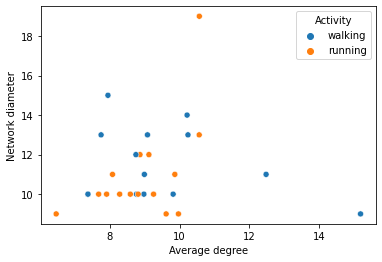

In [37]:
import seaborn as sns
plot1=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

In [38]:
plot1

,axis,part,Activity,subject,Method,Average degree,Network diameter,Average path length
1,attr_x,head,walking,1,NVG,12.481951,11.0,4.520398
13,attr_x,head,running,1,NVG,9.615610,9.0,4.620341
49,attr_x,head,walking,2,NVG,8.764878,10.0,4.491700
61,attr_x,head,running,2,NVG,10.567805,19.0,8.229560
97,attr_x,head,walking,3,NVG,15.190244,9.0,4.158708
109,attr_x,head,running,3,NVG,8.866341,12.0,5.589722
145,attr_x,head,walking,4,NVG,10.241951,13.0,5.364758
157,attr_x,head,running,4,NVG,9.865366,11.0,4.973550
193,attr_x,head,walking,5,NVG,8.991220,11.0,4.853401
205,attr_x,head,running,5,NVG,10.563902,13.0,5.432572


SCATTER PLOT FOR NVG ATTRIBUTE Y WALKING AND RUNNING ACCELEROMETER ON HEAD

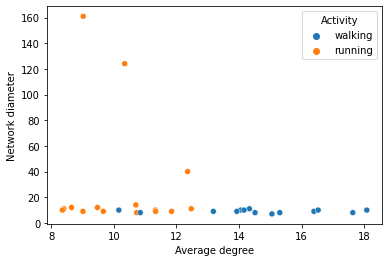

In [39]:
plot1=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

SCATTER PLOT FOR NVG ATTRIBUTE Y WALKING AND RUNNING ACCELEROMETER ON HEAD

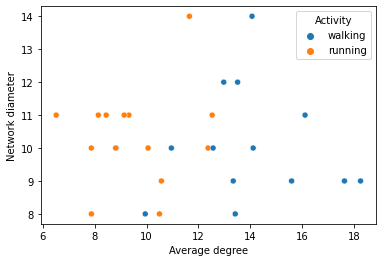

In [40]:
plot1=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

SCATTER PLOT FOR NVG ATTRIBUTE X WALKING AND RUNNING ACCELEROMETER ON CHEST

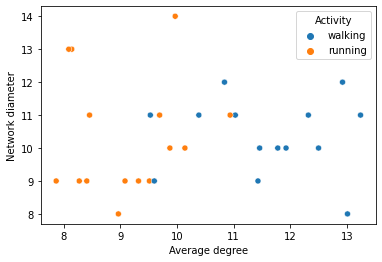

In [41]:
plot1=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

SCATTER PLOT FOR NVG ATTRIBUTE *y* WALKING AND RUNNING ACCELEROMETER ON CHEST

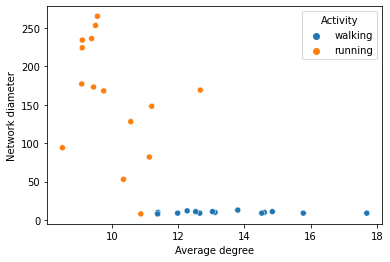

In [42]:
plot1=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

SCATTER PLOR FOR NVG ATTRIBUTE Z WALKING AND RUNNING ACCELEROMETER ON CHEST

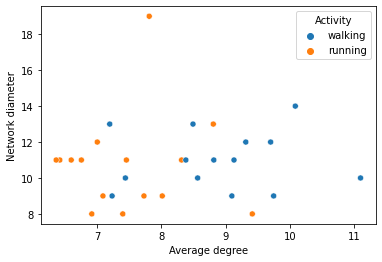

In [43]:
plot1=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

SCATTER PLOR FOR HVG FOR ATTRIBUTE X,Y AND Z WALKING AND RUNNING ACCELEROMETER  ON HEAD AND CHEST

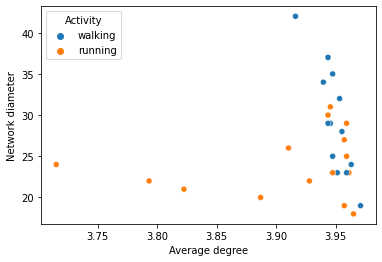

In [44]:
plot1=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

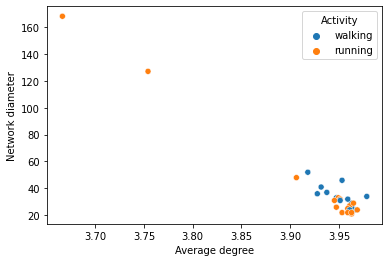

In [45]:
plot1=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

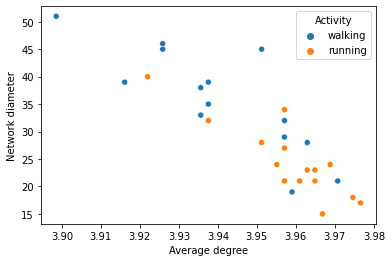

In [46]:
plot1=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

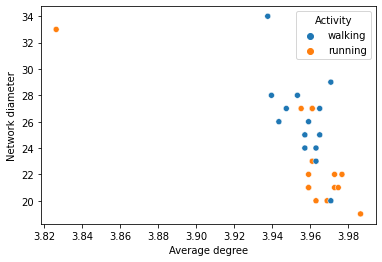

In [47]:
plot1=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

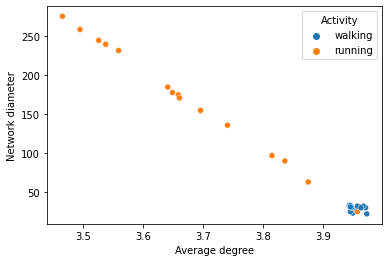

In [48]:
plot1=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

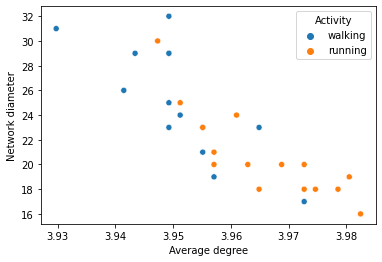

In [49]:
plot1=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="walking" ) | (final_df["Activity"]=="running"))]
plot1
sns.scatterplot(data=plot1 , x="Average degree", y="Network diameter", hue="Activity")

SCATTER PLOT FOR NVG & HVG FOR ATTRIBUTE X,Y AND Z CLIMBING UP AND CLIMBING DOWN ACCELEROMETER ON CHEST and Head

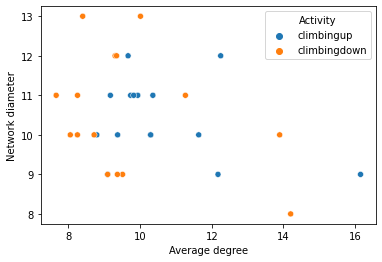

In [50]:
plot2=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

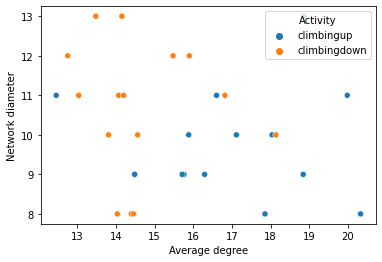

In [51]:
plot2=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

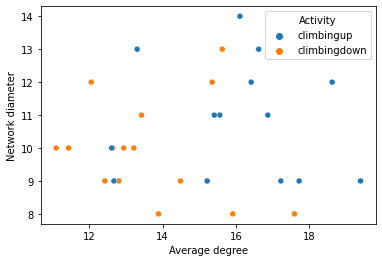

In [52]:
plot2=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

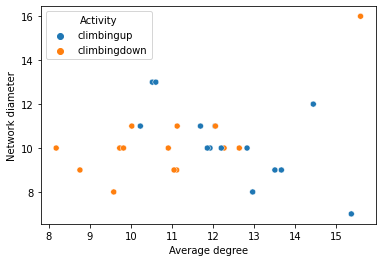

In [53]:
plot2=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

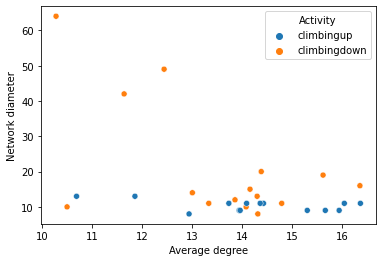

In [54]:
plot2=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

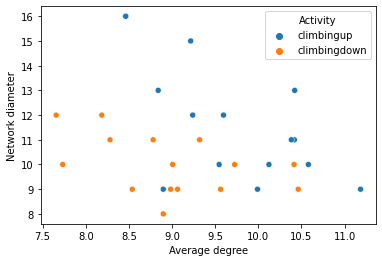

In [55]:
plot2=final_df[(final_df['Method']=="NVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

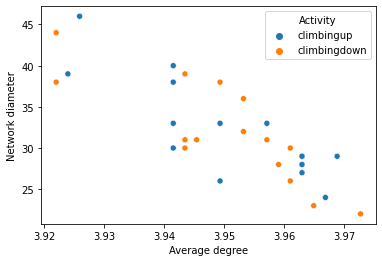

In [56]:
plot2=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

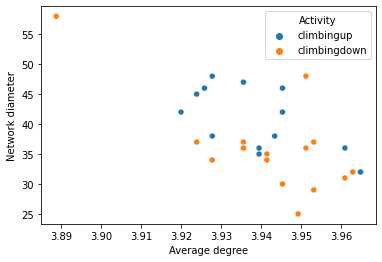

In [57]:
plot2=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

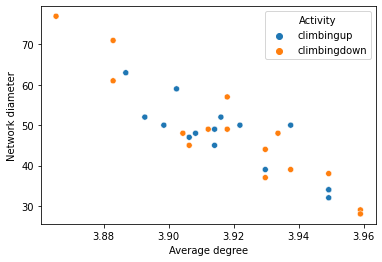

In [58]:
plot2=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="head") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

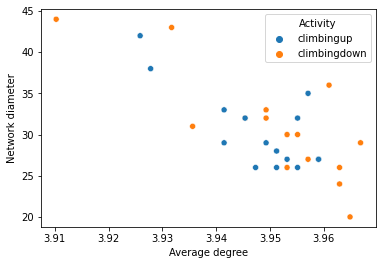

In [59]:
plot2=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_x") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

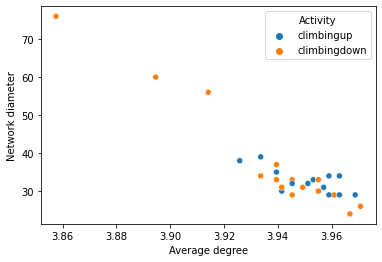

In [60]:
plot2=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_y") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

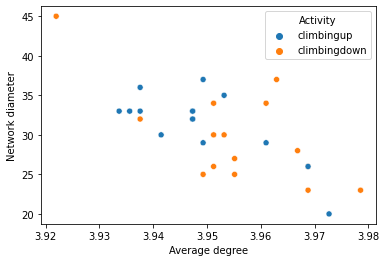

In [61]:
plot2=final_df[(final_df['Method']=="HVG") & (final_df["part"]=="chest") & (final_df["axis"]=="attr_z") & ((final_df["Activity"]=="climbingup" ) | (final_df["Activity"]=="climbingdown"))]
sns.scatterplot(data=plot2 , x="Average degree", y="Network diameter", hue="Activity")

**TASK 2**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
from inspect import Attribute
import os

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
%cd /content/drive/MyDrive/project2-20221205T202223Z-001/project2/subject1

/content/drive/MyDrive/project2-20221205T202223Z-001/project2/subject1


Defining functions :


*   **p_entropy**, computes permutation entropy of a time series
*   **ordinal_patterns**, computes ordinal patterns of a time series for a given embedding dimension and embedding delay
*   **complexity**, computes complexity of a time series





In [65]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

Framing the resultant dataframe as **result_task_2** for each subject and for each axis with given dimension,delay and length and calculating permutation entropy and complexity by calling their respective functions

In [71]:
dimensions=[3,4,5,6]
delays=[1,2,3]
sig_len=[1024,2048,4096]
attribute=['x','y','z']
task2_res=pd.DataFrame(columns=['Subject', 'Accelerometer_axis','signal_length','Dimension', 'Delay', 'Permutation_entropy','Complexity', 'Activity', 'Position' ])

for i in range(1,16):
  csvfile = '/content/drive/MyDrive/project2-20221205T202223Z-001/project2/subject'+str(i)+'/'
  for a in os.listdir(csvfile):
    bodypart= str(a).rstrip('.csv').split('_')[-1]
    activitytype = str(a).rstrip('.csv').split('_')[-2]
    datapart=pd.read_csv(csvfile + '/' + a)
    for b in sig_len:
      datapart1=datapart[0:b]
      for c in attribute:
        for dim in dimensions:
          for delay in delays:
            ordpat= ordinal_patterns(datapart1['attr_' + c], dim, delay)
            perent= p_entropy(ordpat)
            compl= complexity(ordpat)
            #task2_res=task2_res.append({'Subject' : i, 'Accelerometer_axis' : c,'sig_len': y,'Dimension': dim, 'Delay': de, 'Permutation_entropy': pe,'Complexity': comp, 'Activity': activitytype, 'bodypart': bodypart},ignore_index=True)
            task2_res.loc[len(task2_res.index)] = [i,c,b,dim,delay,perent,compl,activitytype,bodypart]
      

In [72]:
task2_res

,Subject,Accelerometer_axis,signal_length,Dimension,Delay,Permutation_entropy,Complexity,Activity,Position
0,1,x,1024,3,1,0.895982,0.089954,climbingup,chest
1,1,x,1024,3,2,0.956601,0.040266,climbingup,chest
2,1,x,1024,3,3,0.978496,0.020725,climbingup,chest
3,1,x,1024,4,1,0.846888,0.150917,climbingup,chest
4,1,x,1024,4,2,0.932609,0.076559,climbingup,chest
...,...,...,...,...,...,...,...,...,...
12955,15,z,4096,5,2,0.819468,0.228447,climbingup,head
12956,15,z,4096,5,3,0.871741,0.187515,climbingup,head
12957,15,z,4096,6,1,0.756573,0.278537,climbingup,head
12958,15,z,4096,6,2,0.838279,0.245443,climbingup,head


Plotting Scatter Plots permutation entropy vs complexity for each body part,dimension, accelerometer_axis and for running and walking activity.


<Figure size 1080x1080 with 0 Axes>

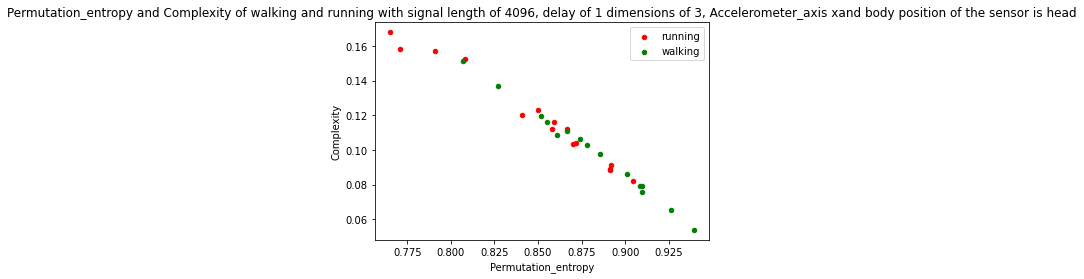

<Figure size 1080x1080 with 0 Axes>

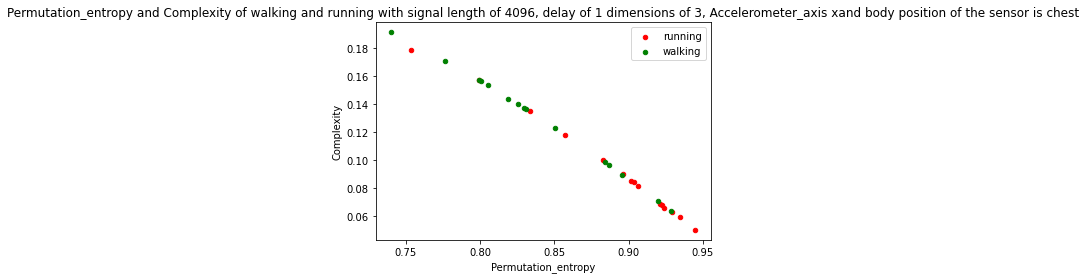

<Figure size 1080x1080 with 0 Axes>

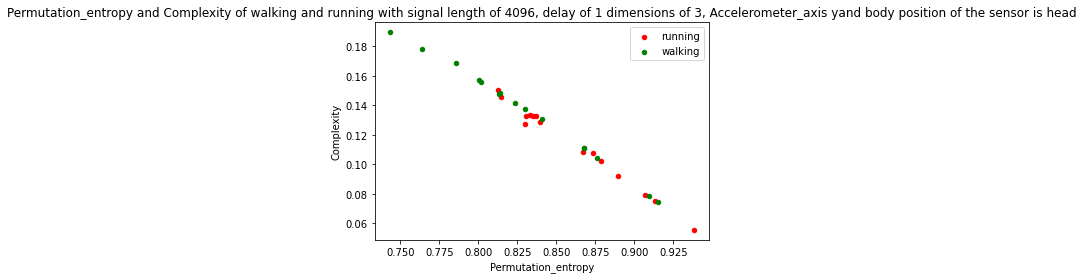

<Figure size 1080x1080 with 0 Axes>

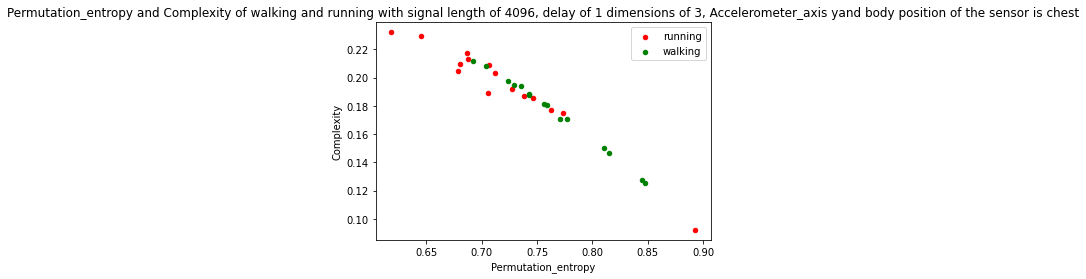

<Figure size 1080x1080 with 0 Axes>

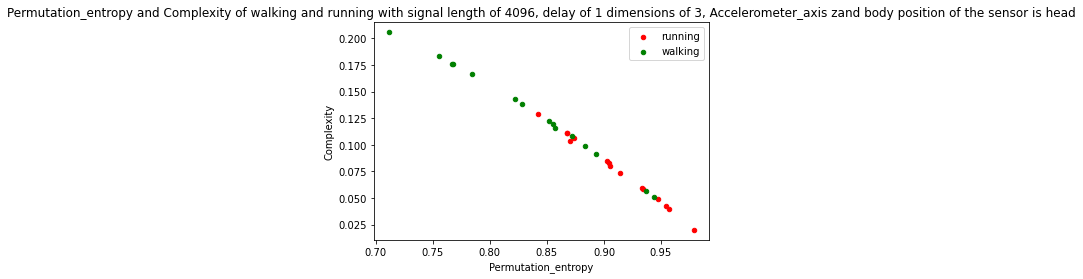

<Figure size 1080x1080 with 0 Axes>

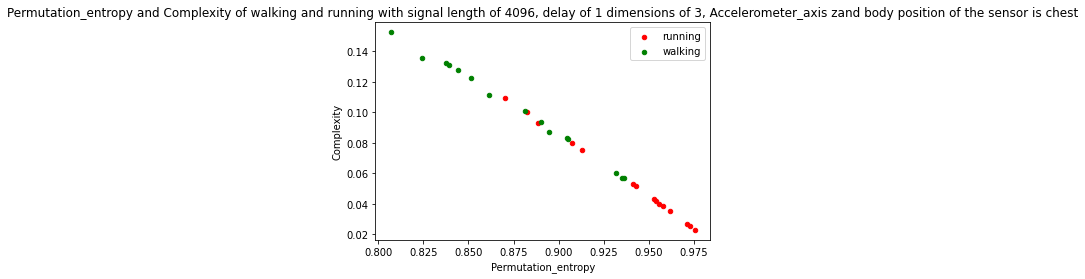

<Figure size 1080x1080 with 0 Axes>

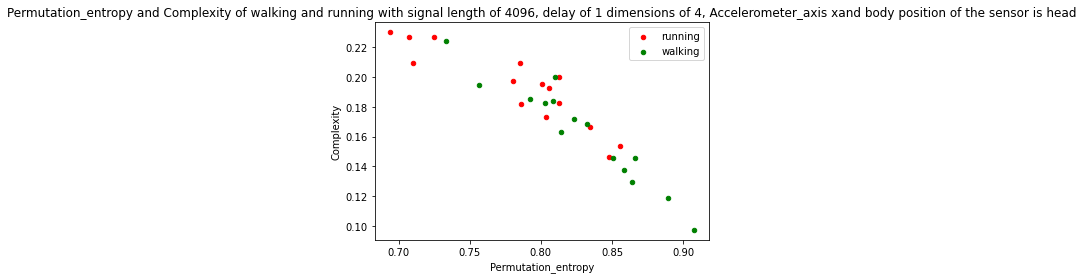

<Figure size 1080x1080 with 0 Axes>

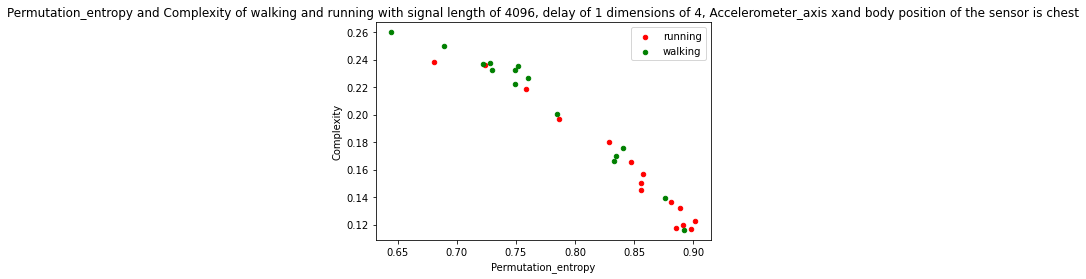

<Figure size 1080x1080 with 0 Axes>

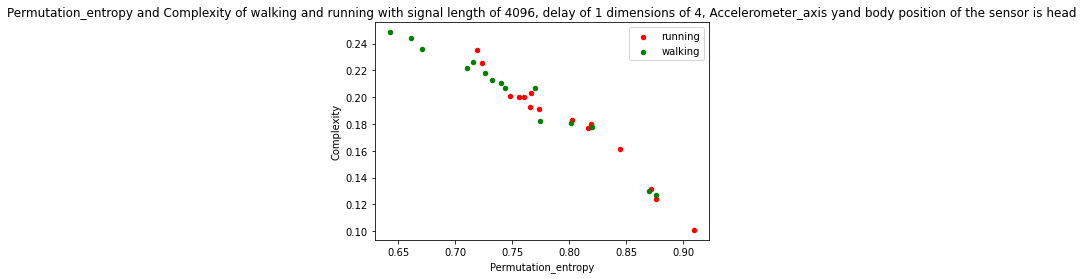

<Figure size 1080x1080 with 0 Axes>

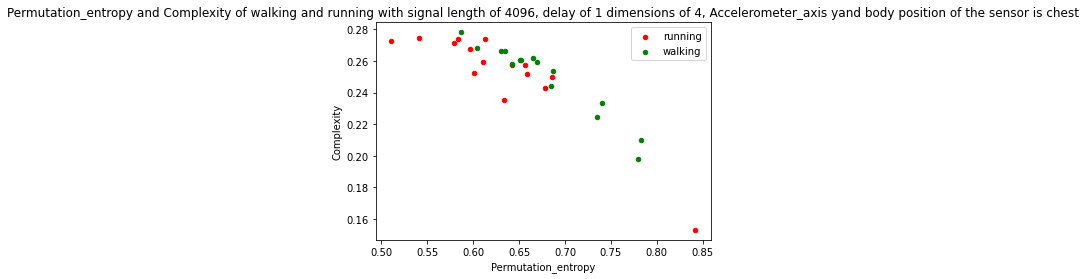

<Figure size 1080x1080 with 0 Axes>

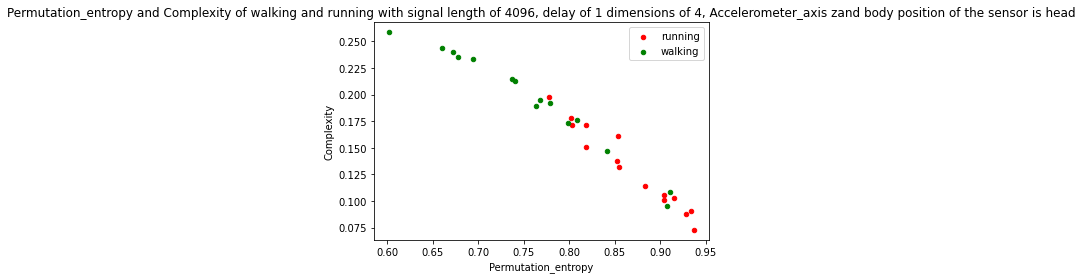

<Figure size 1080x1080 with 0 Axes>

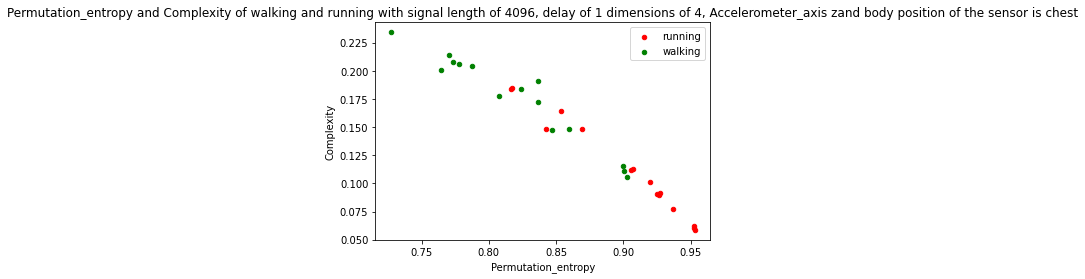

<Figure size 1080x1080 with 0 Axes>

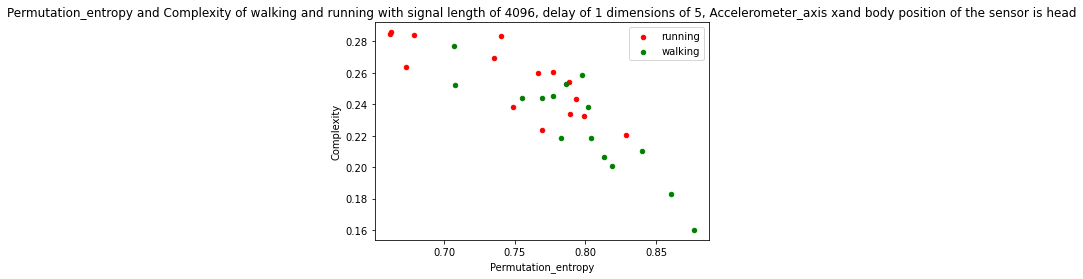

<Figure size 1080x1080 with 0 Axes>

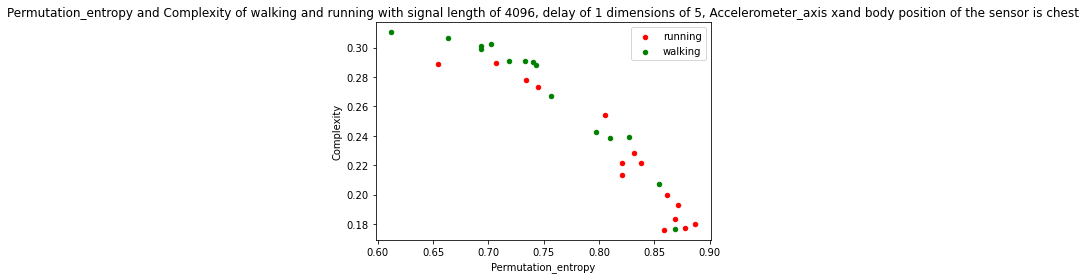

<Figure size 1080x1080 with 0 Axes>

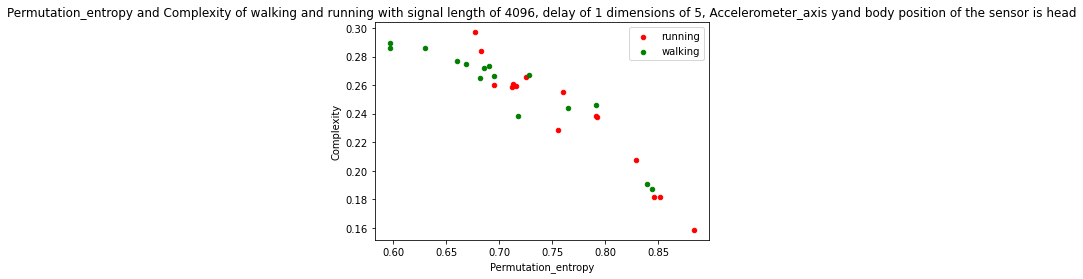

<Figure size 1080x1080 with 0 Axes>

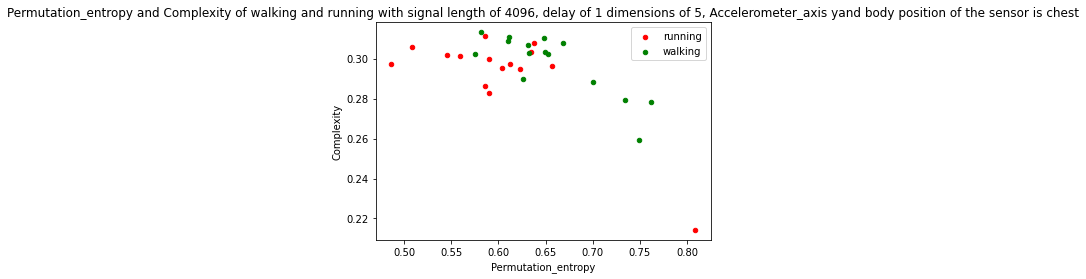

<Figure size 1080x1080 with 0 Axes>

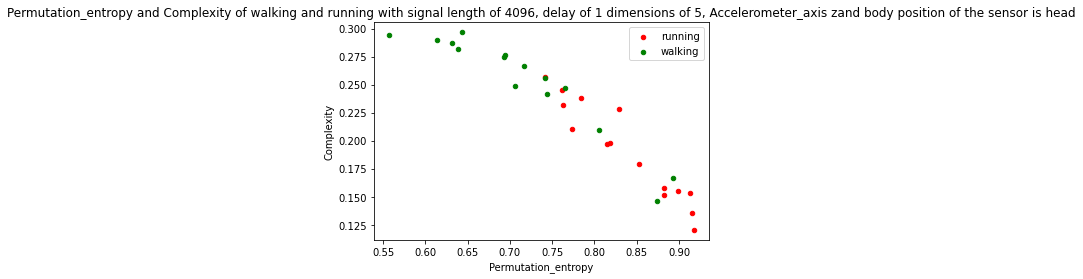

<Figure size 1080x1080 with 0 Axes>

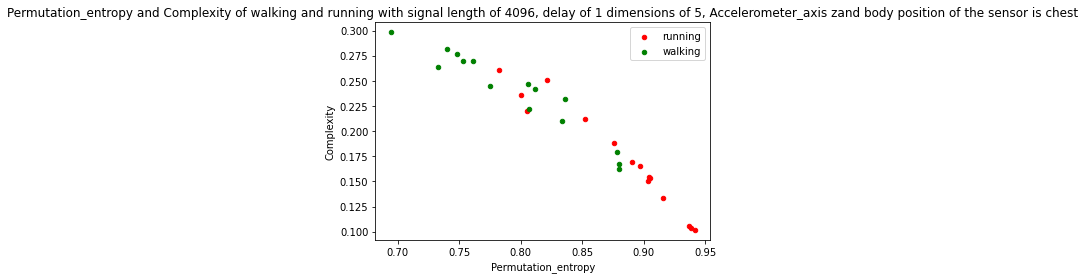

<Figure size 1080x1080 with 0 Axes>

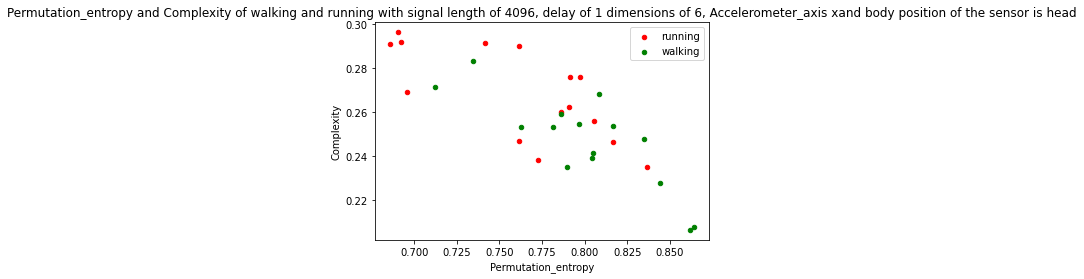

<Figure size 1080x1080 with 0 Axes>

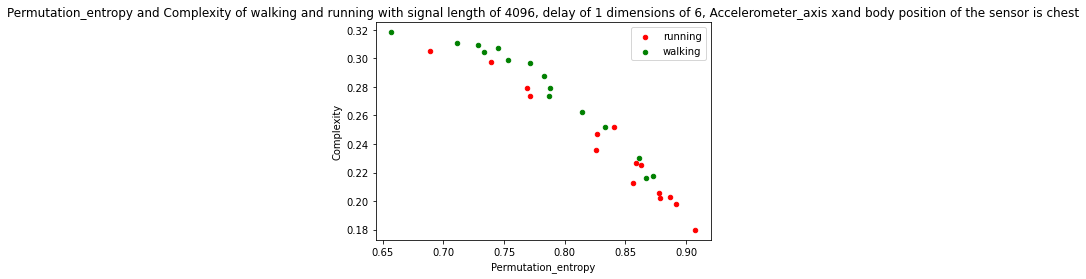

<Figure size 1080x1080 with 0 Axes>

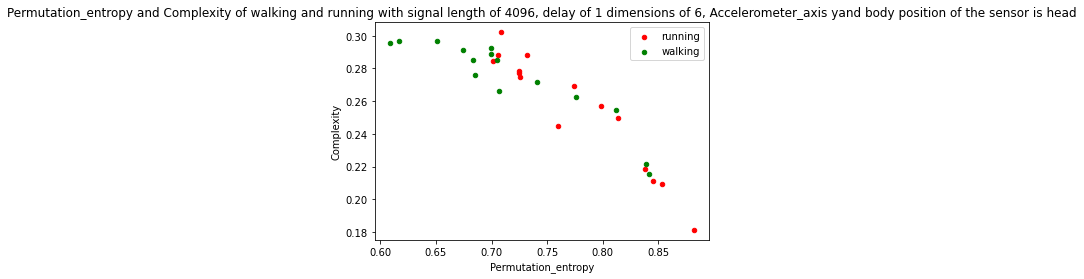

<Figure size 1080x1080 with 0 Axes>

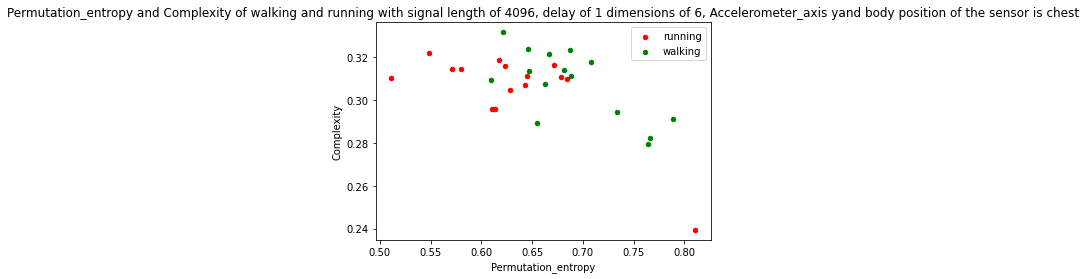

<Figure size 1080x1080 with 0 Axes>

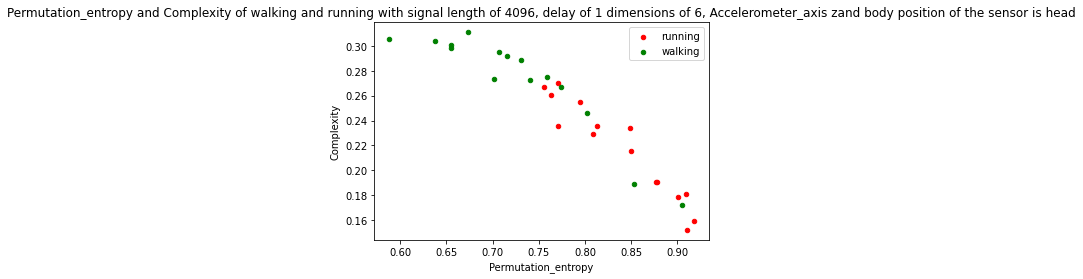

<Figure size 1080x1080 with 0 Axes>

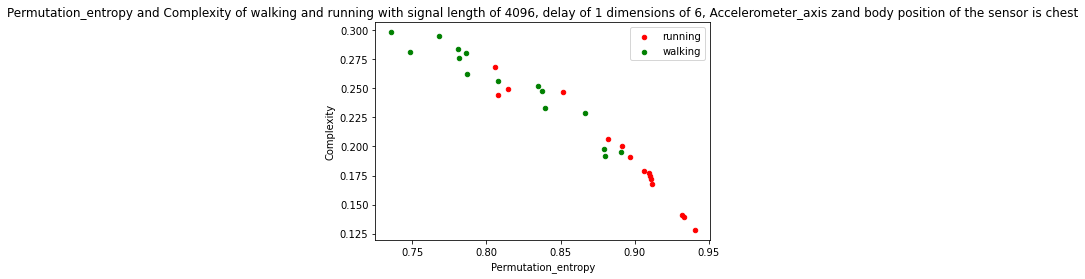

In [74]:
att=['x','y','z']
bodypos= ['head','chest']
for i in range(3,7):
  for j in att:
    for k in bodypos:
      data1 = task2_res[((task2_res['Activity'] == 'running') & (task2_res['signal_length']== 4096) & (task2_res['Delay']==1) & (task2_res['Dimension']==i) &(task2_res['Accelerometer_axis']== j) &(task2_res['Position']==k))]
      data2 = task2_res[((task2_res['Activity'] == 'walking') & (task2_res['signal_length']== 4096) & (task2_res['Delay']==1) & (task2_res['Dimension']==i) &(task2_res['Accelerometer_axis']== j) &(task2_res['Position']==k))]
      fig = plt.figure(figsize = (15,15))
      ax = data1.plot(x='Permutation_entropy', y='Complexity', kind='scatter', c='r',label='running', title= 'Permutation_entropy and Complexity of walking and running with signal length of 4096, delay of 1 dimensions of '+str(i)+', Accelerometer_axis '+j+'and body position of the sensor is '+ k)
      data2.plot(x='Permutation_entropy', y='Complexity', kind='scatter', ax=ax, c='g', label='walking')
      plt.show()

Plotting Scatter Plots permutation entropy vs complexity for each body part,dimension, accelerometer_axis and for climbingdown and climbingup activity.


<Figure size 1080x1080 with 0 Axes>

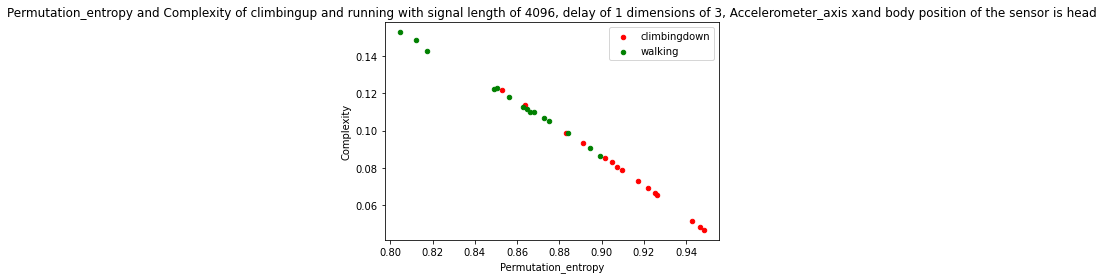

<Figure size 1080x1080 with 0 Axes>

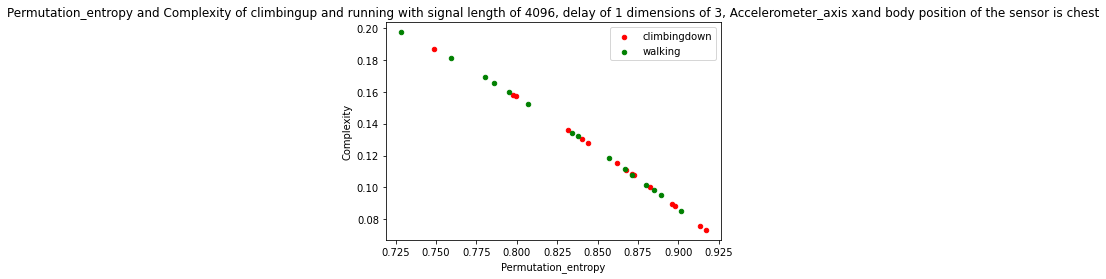

<Figure size 1080x1080 with 0 Axes>

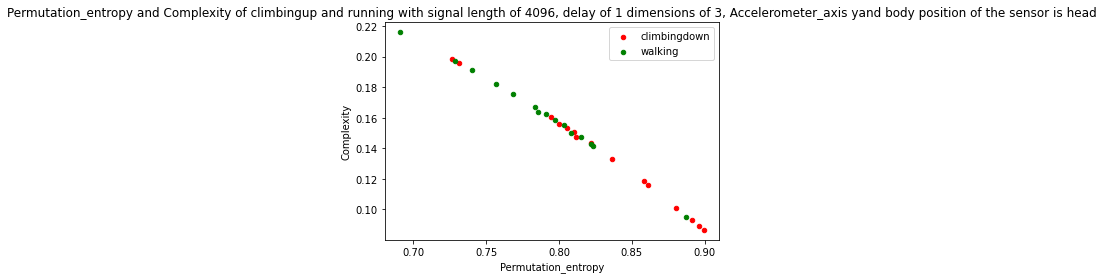

<Figure size 1080x1080 with 0 Axes>

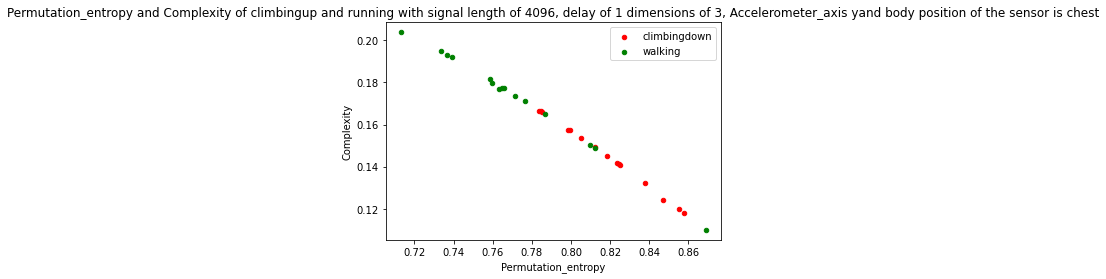

<Figure size 1080x1080 with 0 Axes>

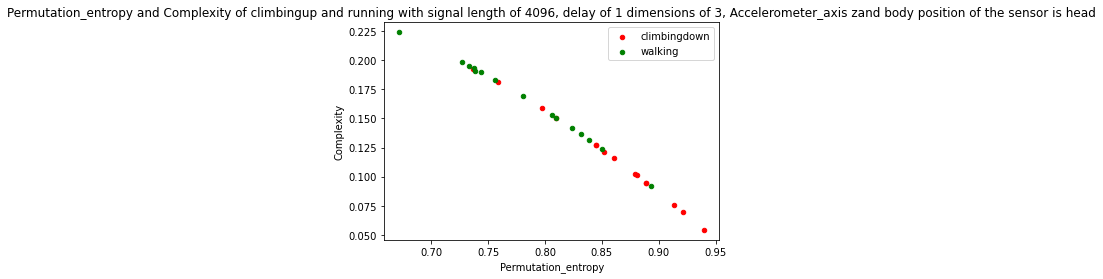

<Figure size 1080x1080 with 0 Axes>

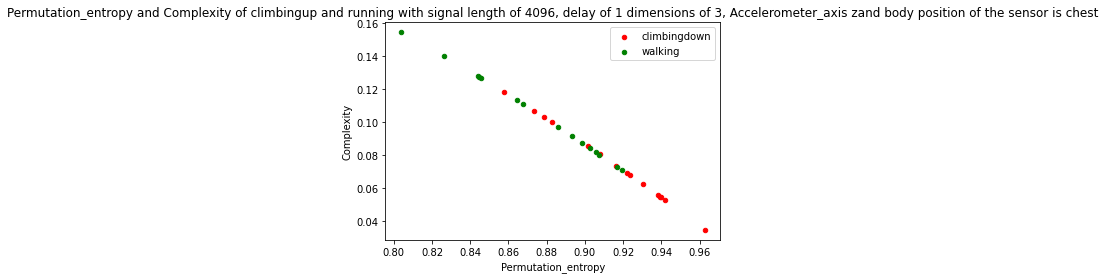

<Figure size 1080x1080 with 0 Axes>

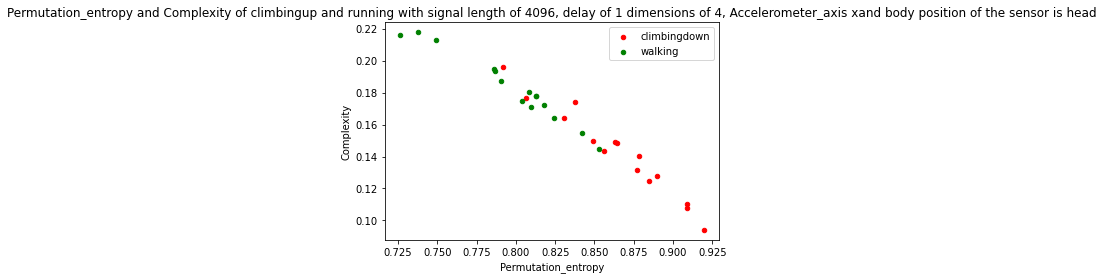

<Figure size 1080x1080 with 0 Axes>

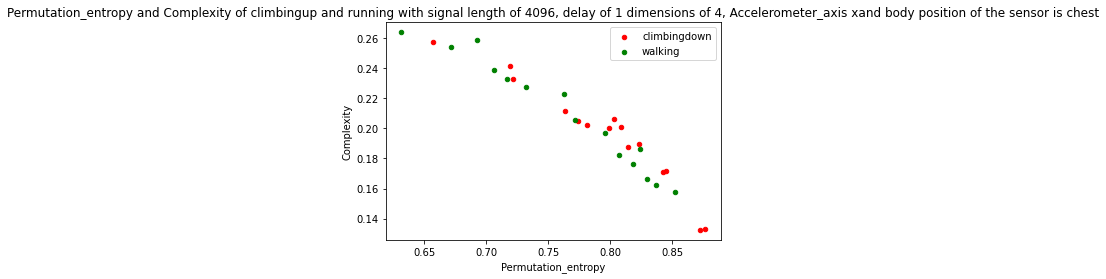

<Figure size 1080x1080 with 0 Axes>

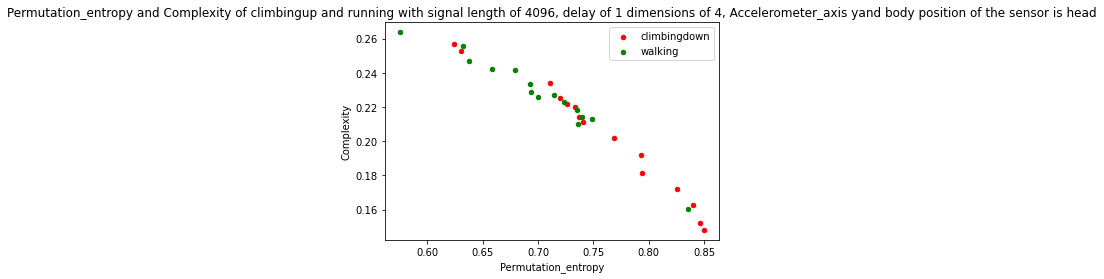

<Figure size 1080x1080 with 0 Axes>

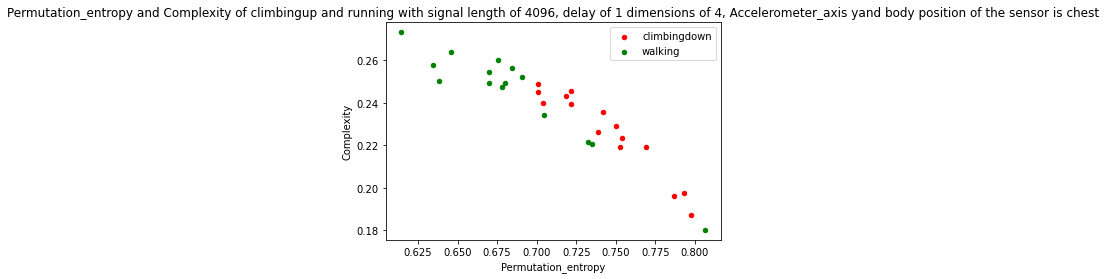

<Figure size 1080x1080 with 0 Axes>

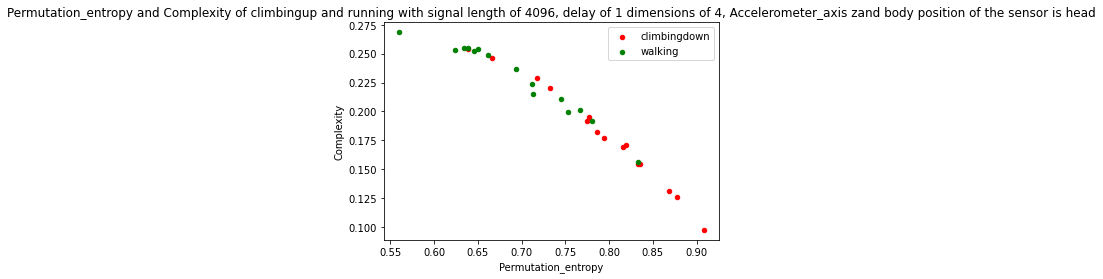

<Figure size 1080x1080 with 0 Axes>

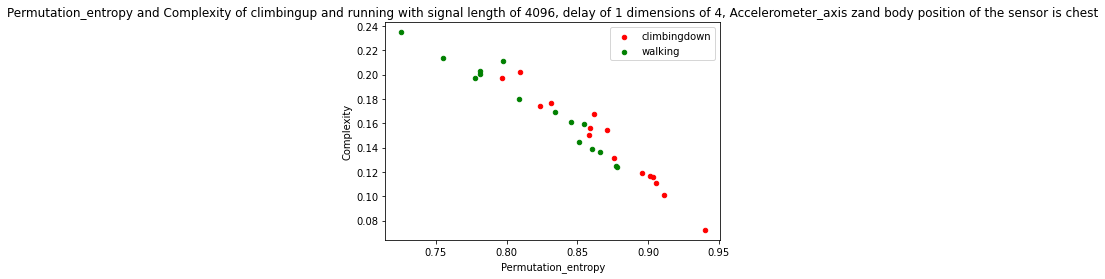

<Figure size 1080x1080 with 0 Axes>

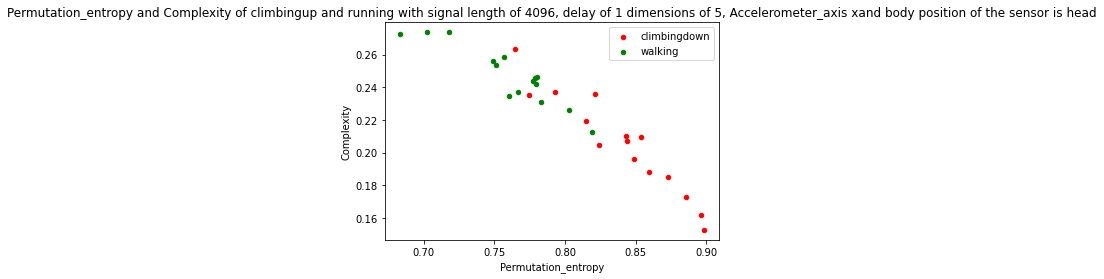

<Figure size 1080x1080 with 0 Axes>

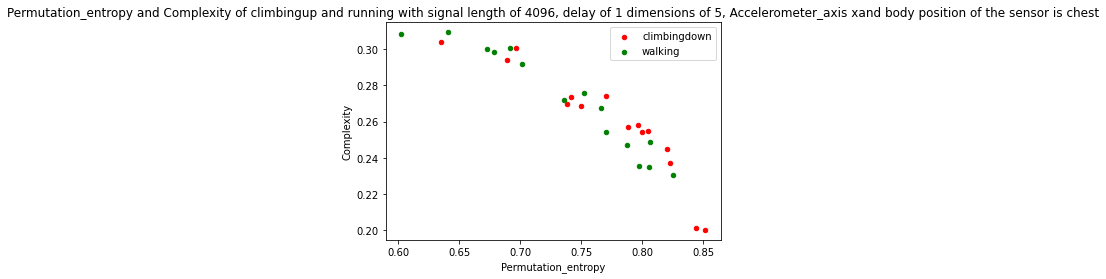

<Figure size 1080x1080 with 0 Axes>

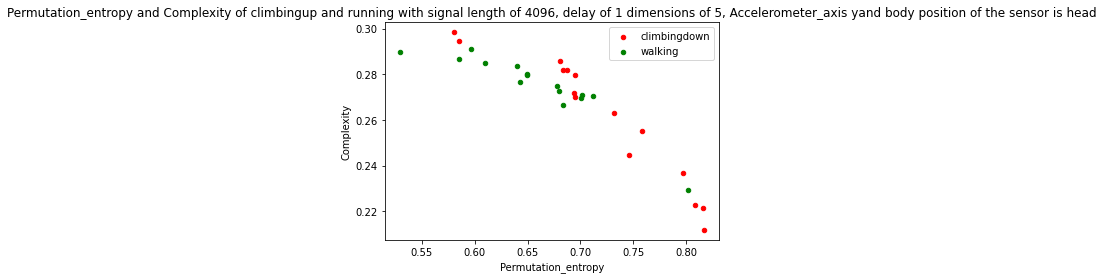

<Figure size 1080x1080 with 0 Axes>

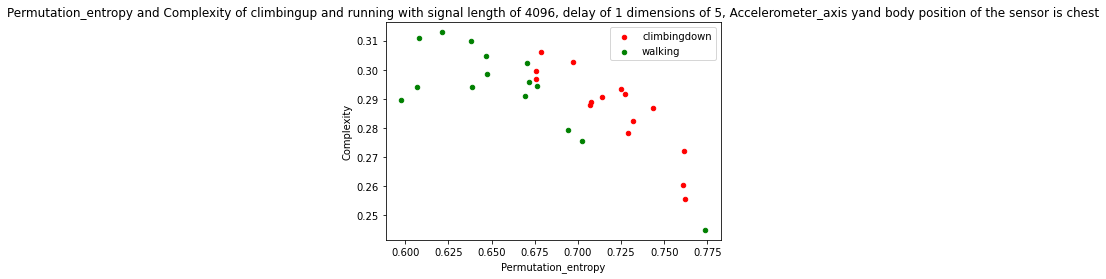

<Figure size 1080x1080 with 0 Axes>

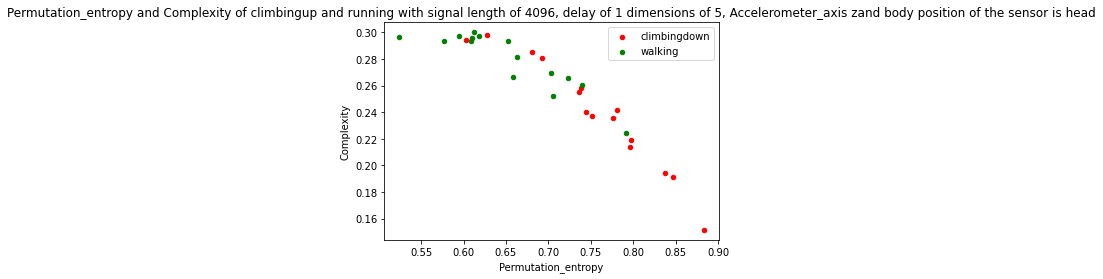

<Figure size 1080x1080 with 0 Axes>

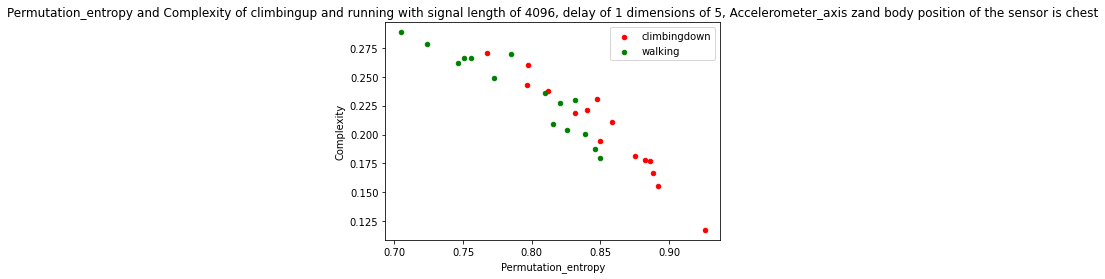

<Figure size 1080x1080 with 0 Axes>

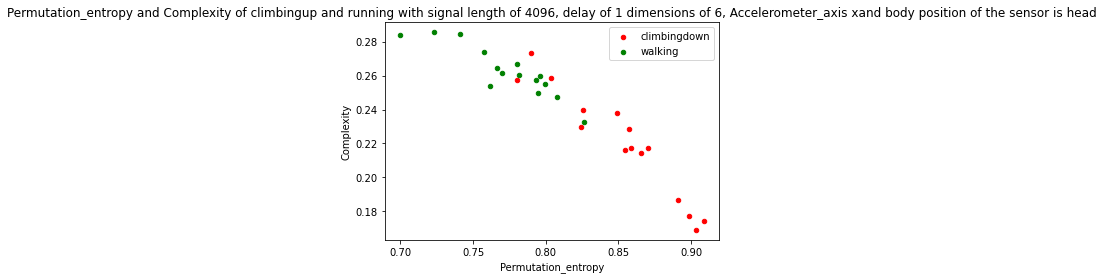

<Figure size 1080x1080 with 0 Axes>

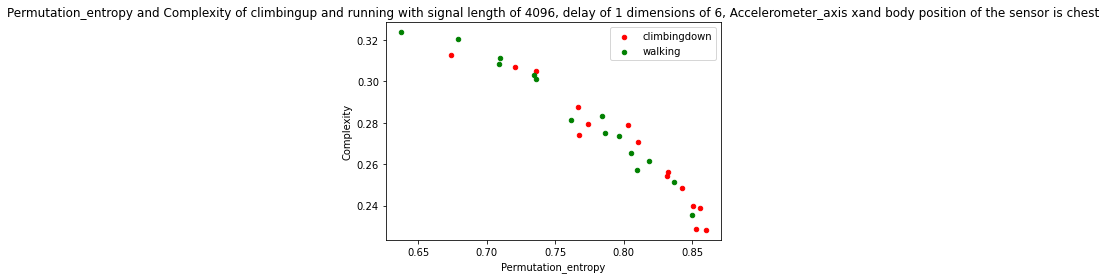

<Figure size 1080x1080 with 0 Axes>

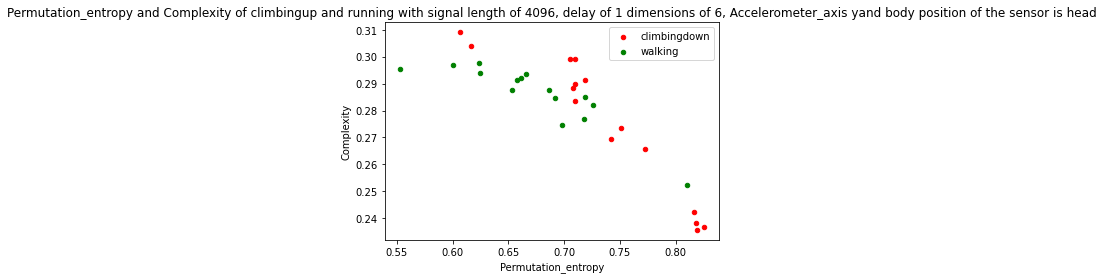

<Figure size 1080x1080 with 0 Axes>

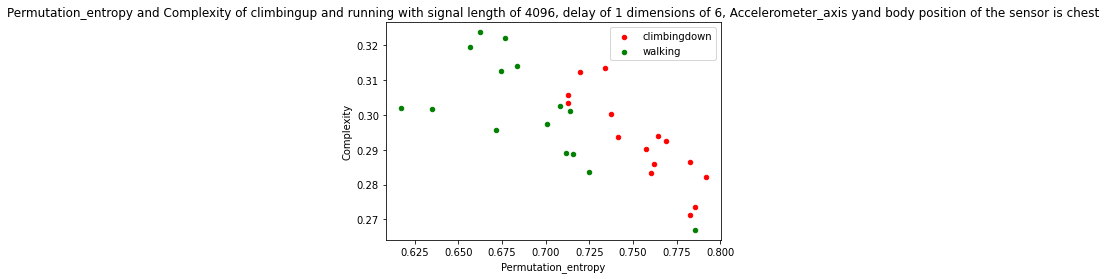

<Figure size 1080x1080 with 0 Axes>

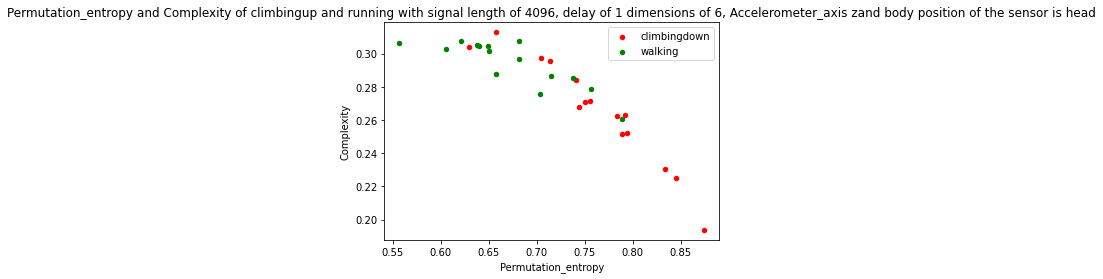

<Figure size 1080x1080 with 0 Axes>

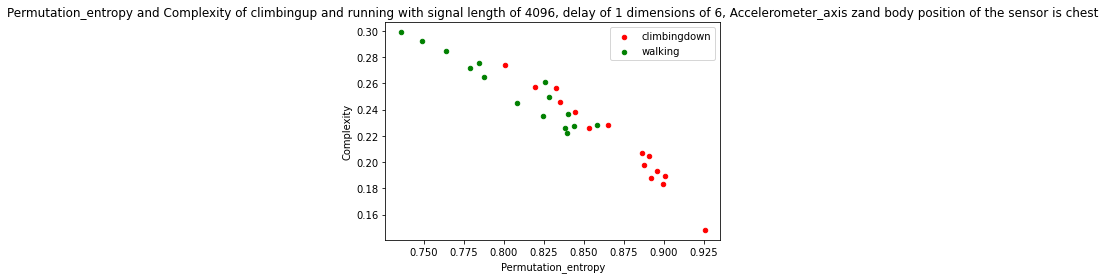

In [75]:
att=['x','y','z']
bodypos= ['head','chest']
for i in range(3,7):
  for j in att:
    for k in bodypos:
      data1 = task2_res[((task2_res['Activity'] == 'climbingdown') & (task2_res['signal_length']== 4096) & (task2_res['Delay']==1) & (task2_res['Dimension']==i) &(task2_res['Accelerometer_axis']== j) &(task2_res['Position']==k))]
      data2 = task2_res[((task2_res['Activity'] == 'climbingup') & (task2_res['signal_length']== 4096) & (task2_res['Delay']==1) & (task2_res['Dimension']==i) &(task2_res['Accelerometer_axis']== j) &(task2_res['Position']==k))]
      fig = plt.figure(figsize = (15,15))
      ax = data1.plot(x='Permutation_entropy', y='Complexity', kind='scatter', c='r',label='climbingdown', title= 'Permutation_entropy and Complexity of climbingup and running with signal length of 4096, delay of 1 dimensions of '+str(i)+', Accelerometer_axis '+j+'and body position of the sensor is '+ k)
      data2.plot(x='Permutation_entropy', y='Complexity', kind='scatter', ax=ax, c='g', label='walking')
      plt.show()

In [80]:
!jupyter nbconvert -- to html /content/FDA_Project_2.ipynb


/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert -- to html /content/FDA_Project_2(1).ipynb'
